In [28]:
'''
Source: http://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html
If you get the error ImportError: cannot import name 'factorial':
    run `pip install statsmodels==0.10.0rc2 --pre` and restart the kernel.
'''
%matplotlib inline
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

Generate some data from an ARMA process:

In [29]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA parameters and that the AR parameters be negated.

In [30]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250 # number of observations
y = arma_generate_sample(arparams, maparams, nobs)

Now, optionally, we can add some dates information. For this example, we'll use a pandas time series.

In [31]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [32]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -353.445
Method:                       css-mle   S.D. of innovations              0.990
Date:                Tue, 18 Jun 2019   AIC                            716.891
Time:                        06:45:32   BIC                            734.498
Sample:                    01-31-1980   HQIC                           723.977
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7904      0.134      5.878      0.000       0.527       1.054
ar.L2.y       -0.2314      0.113     -2.044      0.042      -0.453      -0.009
ma.L1.y        0.7007      0.127      5.525      0.0

In [33]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
dtype: float64

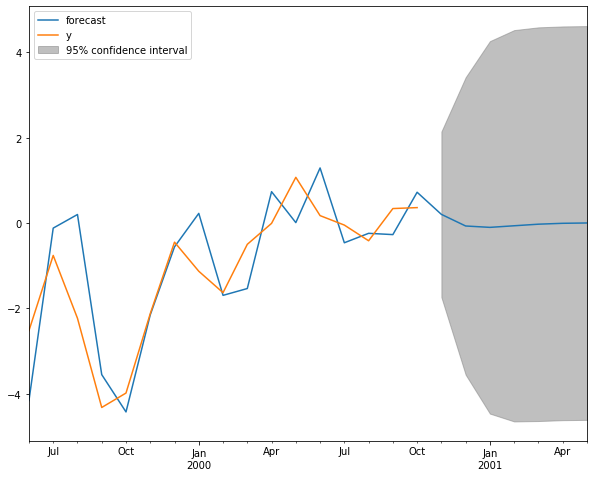

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start='1999-06-30', end='2001-05-31', ax=ax) # end='2188-04-30' for nobs=2500
legend = ax.legend(loc='upper left')

Other experimental code where we first gerenate data from some model and then learn that model.

In [38]:
# Source: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html
import numpy as np
import statsmodels.api as sm
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.79044192, -0.23140636,  0.70072906,  0.40608023])